<a href="https://colab.research.google.com/github/JuanAndresRodriguez/TensorFlow-2.0-Complete-Course/blob/main/Neural_Networks_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Get Data from MNIST fashion dataset
# 60000 images for training and 10000 images for validation/testing
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training

In [3]:
# Look at the data shape
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23] # look at one pixel

194

In [5]:
# pixel values are between 0 and 255 0 being black and 255 being white. 
# We have a grey scale images and no color channels

# Look at the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
# our labels are integers from 0 - 9. Each Integer represets a specific article of clothing. We'll create a list of labels to indicate wich is wich.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

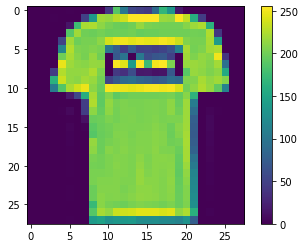

In [7]:
# let's look at some of the images
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocess Data
Last step before creating our model is to preprocess our data. This simply means appling some prior transformations to our data before feeding it the model. In this case we will simply  scale all of our greyscale pixel values (0 - 255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255. We do this because smaller values will make it easier for the model to process our values.

In [8]:
train_images = train_images / 255.0
test_images = test_images /255.0

# Building the Model
Now it's time to build the model. We are going to use keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and it´s architecture below.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(
    optimizer='adam', # performs stochastic gradient descent
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

In [11]:
# training the model
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4956 - accuracy: 0.8254
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3763 - accuracy: 0.8649
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8763


In [12]:
# See the accuracy against the testing data

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test acuracy:',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3796 - accuracy: 0.8637
Test acuracy: 0.8636999726295471


313/313 [==============================] - 0s 1ms/step
Ankle boot


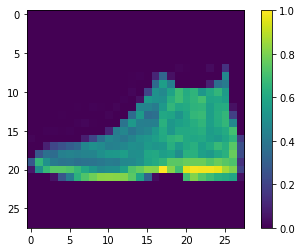

In [13]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pullover


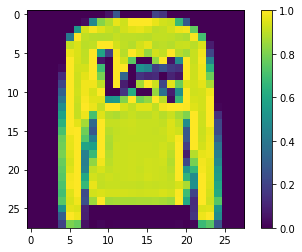

In [14]:
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Trouser


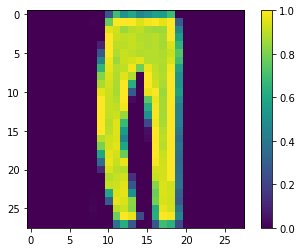

In [15]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 10000:
        return int(num)
      else:
        print("Try again...")

pick a number: 48
1/1 [==============================] - 0s 46ms/step


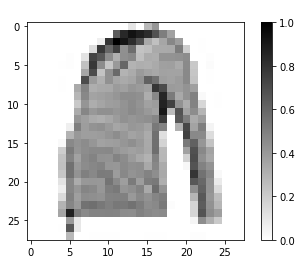

In [17]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)